In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import scipy as sp
from scipy import stats as scs
from scipy.stats import chi2_contingency

Please note that for the questions involving random number generators or sampling, your answer might differ a little from those provided in the examples. For such questions, you should use the values in the examples as a reference and not try to match exactly with them. 

## Q1 (2 pts)

(a) Consider the data in the file 'iris_imbalanced.csv'. It contains a column 'Class', which is the class label with three discrete values (0/1/2). Create a bar plot showing the number of examples for each class. 

145


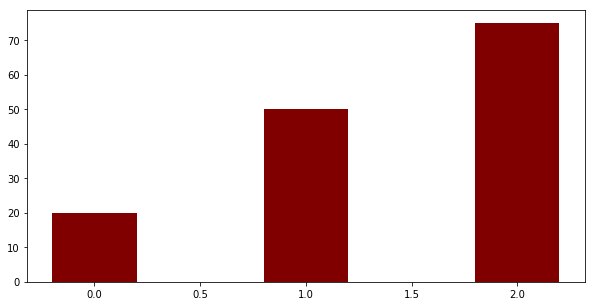

In [19]:
###
### YOUR CODE HERE
###
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("iris_imbalanced.csv")
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
c0=0
c1=0
c2=0
n=df[df.columns[0]].count()
print(n)
for i in range (n):
     if(df.iloc[i,4]==0):
        c0+=1
     if(df.iloc[i,4]==1):
        c1+=1
     if(df.iloc[i,4]==2):
        c2+=1
        
plt.bar([0,1,2], [c0,c1,c2], color ='maroon',width = 0.4)
plt.show()

(b) Write a method to analytically (i.e., using scipy.stats.norm.interval) calculate a confidence interval of the mean for the specified column.

In [20]:
# calculateCI(filename, attribute, ciPercent) takes as input the filename to read in 
# data from, attribute (string) as the column, and CI percentage. Returns the 
# calculated CI as a tuple. 
#
import statistics,math
import scipy.stats as s 
def calculateCI(filename, attribute, ciPercent):
    ###
    ### YOUR CODE HEREvar
    ###
    df=pd.read_csv(filename)
    n=len(df)
    print(n)
    return s.norm.interval(ciPercent,loc=df[attribute].mean(), scale=df[attribute].std()/math.sqrt(n))
# For example,
calculateCI('iris_imbalanced.csv', 'Sepal Width', 0.95)
# -> (2.97485548067057, 3.1161790020880513)

145


(2.97485548067057, 3.1161790020880513)

In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


(c) Write a method that uses bootstrap resampling to calculate a confidence interval of the mean for the specified column, using the specified number of trials. In other words, repeatedly sample with replacement (where the sample size id the length of column) and recalculate the mean, then compute the confidence interval from the empirical distribution of resampled means. 

In [23]:
# calculateCIBootstrap(filename, attribute, ciPercent, numTrials) takes as input 
# the filename to read in data from, attribute (string) as the column, the CI 
# percentage, and number of trials for estimation. Returns the calculated CI as a tuple. 
#
def calculateCIBootstrap(filename, attribute, ciPercent, numTrials):
    ###
    ### YOUR CODE HERE
    ###
    dB = pd.read_csv(filename)
    dB=dB[attribute]
    numExamples = len(dB)
    dBmeans = []
    for i in range(numTrials):
     # sample with replacement
     tmpB = dB.sample( replace=True)
     dBmeans.append(tmpB.mean())
    dBmeans.sort()
    return s.norm.interval(ciPercent,loc=statistics.mean(dBmeans), scale= scs.sem(dBmeans))

# For example,
calculateCIBootstrap('iris_imbalanced.csv', 'Sepal Width', 0.95, 100)
# varies, but around -> (2.984189655172414, 3.1090689655172414)


(2.8907375159376953, 3.0632624840623044)

(d) Now, repeat Q1c but instead of creating a boostrap resample with the same size as the dataset, only sample the specified number of examples. Explore the difference that sample size and number of trials makes on the estimated confidence interval.

In [24]:
# calculateCIBootstrapSize(filename, attribute, ciPercent, numTrials, sampleSize) takes 
# as input the filename to read in data from, attribute (string) as the column, the CI 
# percentage, number of trials for estimation, and sample size. Returns the calculated 
# CI as a tuple. 
#

def calculateCIBootstrapSize(filename, attribute, ciPercent, numTrials, sampleSize):

    ###
    ### YOUR CODE HERE
    ###
    dB = pd.read_csv(filename)
    dB=dB[attribute]
   
    dBmeans = []
    for i in range(numTrials):
     # sample with replacement
     tmpB = dB.sample(sampleSize, replace=True)
     dBmeans.append(tmpB.mean())
    dBmeans.sort()
    return s.norm.interval(ciPercent,loc=statistics.mean(dBmeans), scale= scs.sem(dBmeans))

    
# For example,
calculateCIBootstrapSize('iris_imbalanced.csv', 'Sepal Width', 0.95, 100, 25)
# varies but around -> (2.8796, 3.2001999999999997)

(3.022237223990964, 3.0551227760090356)

## Q2 (3 pts)

(a) Consider the event of rolling a six-sided die. Randomly simulate this event 1000 times and plot a histogram of results for each number on the dice (use number of bins=6).

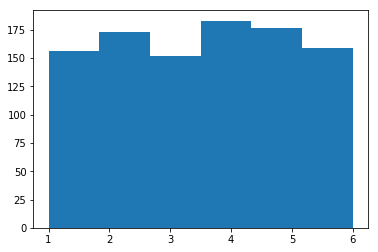

In [25]:
import random
num_trials = 1000
###
### YOUR CODE HERE
###
dice=[]
for i in range(num_trials):
    dice.append(random.randrange(1, 7, 1))
plt.hist(dice, 6)
plt.show()

    


(b) Write a method to use the same random simulation and return the empirical probability of getting a value greater than or equal to the specified target value (e.g., >=5).

In [26]:
# calculateDiceRollProb(numTrials, targetValue) takes as input the number of 
# trials for estimation and the target value. 
# Returns the empirical probability of getting a value >= the specified target value. 
#
def calculateDiceRollProb(numTrials, targetValue):
    ###
    ### YOUR CODE HERE
    ###
    dice=[]
    count=0
    for i in range(num_trials):
        rand=random.randrange(1, 7, 1)
        dice.append(rand)
        if(rand>=targetValue):
            count+=1
    return count/num_trials

# For example,
calculateDiceRollProb(1000, 4)
# varies, but around -> 0.5

0.53

(c) Now consider the event where you roll multiple dice and take the max value observed. Write a function that randomly simulate this event multiple times and returns the maximum value obtained in each trial. 

In [27]:
# get_max_values(num_trials, num_dice) takes as input the number of trials and the 
# number of dice to be rolled simultaneously, and returns a list of maximum value 
# obtained in each trial as a pandas DataFrame.
def get_max_values(num_trials, num_dice):
    ###
    ### YOUR CODE HERE
    ###
    dice=[]
    temp=[]
    count=0
    for i in range(num_trials):
        for i in range(num_dice):
            rand=random.randrange(1, 7, 1)
            temp.append(rand)
        dice.append(max(temp))
        
    return (dice)

get_max_values(3, 5)

# Varies, expect lots of 6's and 5's, example ->  [6,5,5]


[5, 5, 6]

(d) Use the method from Q2c to simulate 1000 trials with 10 dice. Plot a histogram of resulting max values (use number of bins=6).

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 

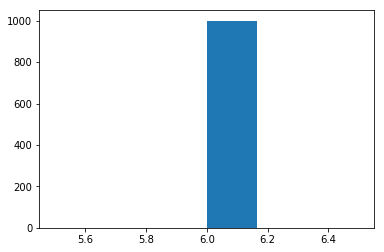

In [45]:
num_trials = 1000
num_dice = 10
###
### YOUR CODE HERE
###
dice=get_max_values(num_trials, num_dice)
print(dice)
plt.hist(dice, 6)
plt.show()


(e) Write a function that uses the method from Q2c to simulate multiple trials of rolling several dice and taking the max. Calculate the empirical probability of getting a max value greater than or equal to the specified target value (e.g., >=5).

In [29]:
# calculateMaxDiceRollProb(num_trials, num_dice, target_value) takes as input the 
# number of trials, the number of dice to be rolled simultaneously, and the target 
# value. Returns the empirical probability of getting a max value >=target value.
def calculateMaxDiceRollProb(num_trials, num_dice, target_value):
    
    ###
    ### YOUR CODE HERE
    ###
    dice=[]
    temp=[]
    count=0
    for i in range(num_trials):
        for i in range(num_dice):
            rand=random.randrange(1, 7, 1)
            temp.append(rand)
        mx=max(temp)
        temp=[]
       
        dice.append(mx)
        if(mx>=target_value):
            count+=1
        
    return (count/num_trials)
    
# calculateMaxDiceRollProb(1000, 10, 6)

# For example,
calculateMaxDiceRollProb(1000, 10, 6)
# varies, near -> 0.838

0.838

## Q3 (4 pts)

Consider the AB test results in the csv file 'ab_data.csv'. The data consists of 2000 users. The column 'group' indicates whether the user is assigned to the control group (A) or the treatment group (B). The column 'premium_signed_up' indicates whether the user signed up for the premium service or not with a 1 or 0, respectively. 

(a) Calculate the difference in means between group A and B for the 'premium_signed_up' attribute.

In [40]:
###
### YOUR CODE HERE
###
df=pd.read_csv("ab_data.csv")
print((sum((df[df.group=="A"])['premium_signed_up'])/len((df[df.group=="A"])))-(sum((df[df.group=="B"])['premium_signed_up'])/len((df[df.group=="B"]))))


0.08771215329263711


(b) Apply randomization testing to calculate an empirical distribution in the difference in means between the two groups. Specifically, randomly permute the assignment of group A/B for given number of trials and calculate difference in means between the two groups. Repeatedly do this to estimate a null distribution. Return the resulting difference obtained for each trial as a pandas dataframe.

In [41]:
# calculateEmpiricalDiffMeans(num_permutation_trials) takes as input the number of permutation trials.
# Returns the difference in means between the A and B groups obtained for each trial as a pandas dataframe. 
import numpy as np
def calculateEmpiricalDiffMeans(num_permutation_trials): 
    ###
    ### YOUR CODE HERE
    ###
    df=pd.read_csv("ab_data.csv")
    dShape = df.group.values 
    diffQs = []
    #print(df.iloc[0:3,0])
    for i in range(num_permutation_trials):    
        # randomly split data into two groups  
       
        (random.shuffle(( df.group.values))) 
        #print(df.iloc[0:3,0])
        #partitions = np.split(dShape,2)    
        tD1 = pd.DataFrame(df[df.group=="A"])    
        tD2 = pd.DataFrame(df[df.group=="B"])     
        g1Q = tD1.iloc[:,1].mean().item()     
        g2Q = tD2.iloc[:,1].mean().item()
        dQ = g1Q-g2Q     
        diffQs.append(dQ)
    return (diffQs)

# For example,
calculateEmpiricalDiffMeans(100) # -> (100 x 1 Pandas Dataframe)

[0.0037096122157695283,
 -0.009290781046126649,
 0.015709975226750612,
 -0.00429062979155119,
 -0.017291023053447367,
 0.0007095214630242624,
 -0.008290750795211556,
 -0.012290871798871922,
 -0.007290720544296463,
 -0.007290720544296463,
 0.006709702968514794,
 -0.0022905692897210173,
 0.0047096424666846146,
 0.0047096424666846146,
 0.002709581964854435,
 -0.010290811297041735,
 -0.006290690293381383,
 -0.012290871798871922,
 -0.005290660042466283,
 0.0047096424666846146,
 0.0047096424666846146,
 -0.006290690293381383,
 0.0007095214630242624,
 0.00870976347034498,
 -0.001290539038805924,
 0.006709702968514794,
 0.007709733219429894,
 0.005709672717599701,
 -0.0022905692897210173,
 -0.0022905692897210173,
 -0.0032905995406361105,
 -0.005290660042466283,
 -0.001290539038805924,
 0.0007095214630242624,
 -0.014290932300702101,
 -0.02029111380619264,
 0.0007095214630242624,
 -0.017291023053447367,
 0.0017095517139393557,
 0.006709702968514794,
 0.0007095214630242624,
 0.0017095517139393557,

(c) Use the method from Q3b and plot the results of 100 permutation trials as a histogram.

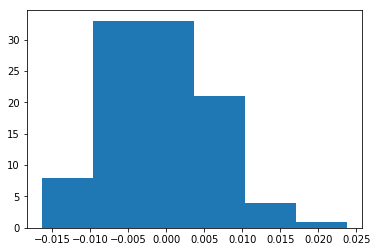

In [42]:
num_permutation_trials = 100
###
### YOUR CODE HERE
###
plt.hist(calculateEmpiricalDiffMeans(100), 6)
plt.show()


(d) Use the observed difference calculated in Q3a, and the method from Q3b, to conduct a hypothesis test to determine whether the observed difference is significant. Specifically, determine the empirical probability of observing the observed difference under the null hypothesis. 

In [43]:
# testSignificanceDiffMeans(numTrials, alpha) takes as input the number of trials, and the significance level alpha.
# Returns a tuple with the first element as:
# the empirical probability of observing the observed difference under the null hypothesis, and
# the second element as the decision to "accept" or "reject" the hypothesis. 
import scipy.stats as st
def testSignificanceDiffMeans(numTrials, alpha):
    ###
    ### YOUR CODE HERE
    ###
    contTab = pd.crosstab(df.group,df['premium_signed_up'])
    print(contTab)
    x=st.chi2_contingency(contTab)[1]
    if(x>alpha):
     a='accept'
    else:
     a='reject'
    return x,a
    
# For example,
testSignificanceDiffMeans(100, 0.1)
# -> (0.0, 'reject')


premium_signed_up     0    1
group                       
A                  1773  216
B                  1969   42


(3.0007971180952426e-29, 'reject')

## Q4 (3 pts)

(a) Consider the data in the files 'over_50.csv' and 'under_50.csv', about the number of hours of exercise per week and the probability of developing a disease, for two groups of patients, those below the age of 50 and those over the age of 50, respectively.

Create two labeled scatter plots (one for each dataset) with 'Hours Exercised' on the x axis and 'probability' on the y-axis. 

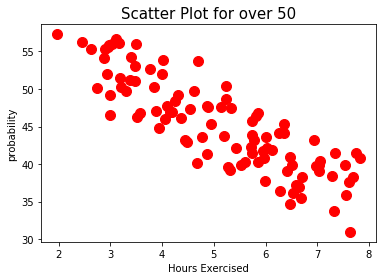

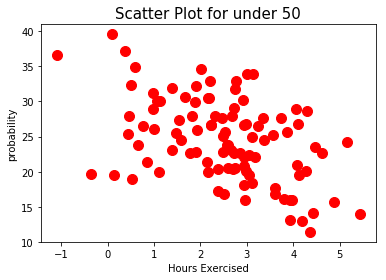

In [34]:
###
### YOUR CODE HERE
###
df1=pd.read_csv("over_50.csv")
df2=pd.read_csv("under_50.csv")
plt.scatter(df1["Hours Exercised"],df1["probability"],s=100,color="red")
plt.xlabel("Hours Exercised")
plt.ylabel("probability")
plt.title("Scatter Plot for over 50",fontsize=15)
plt.show()
plt.scatter(df2["Hours Exercised"],df2["probability"],s=100,color="red")
plt.xlabel("Hours Exercised")
plt.ylabel("probability")
plt.title("Scatter Plot for under 50",fontsize=15)
plt.show()

(b) Calculate the correlation between the 'Hours Exercised' and 'probability' for the two datasets. 

In [35]:
###
### YOUR CODE HERE
###
cor2=df2["Hours Exercised"].corr(df2["probability"])
cor1=df1["Hours Exercised"].corr(df1["probability"])
print(cor1,cor2)

-0.8574318141725066 -0.4766996516261135


(c) Now, combine the data in the two files (you can use the concat() function in pandas to concatenate two dataframes). Create a scatter plot with 'Hours Exercised' on the x axis and 'probability' on the y-axis.

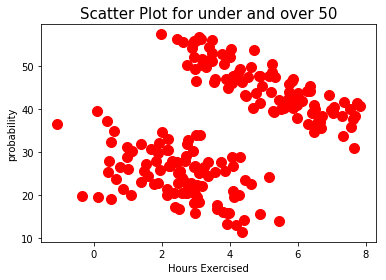

In [36]:
###
### YOUR CODE HERE
###
df=pd.concat([df1, df2])
plt.scatter(df["Hours Exercised"],df["probability"],s=100,color="red")
plt.xlabel("Hours Exercised")
plt.ylabel("probability")
plt.title("Scatter Plot for under and over 50",fontsize=15)
plt.show()

(d) Compute the correlation between the 'Hours Exercised' and 'probability' for the combined data. 

In [37]:
###
### YOUR CODE HERE
###
cor=df["Hours Exercised"].corr(df["probability"])
print(cor)

0.32863439089294455


(e) Discuss how Simpson's Paradox has occured in this data by considering your results above. 

### YOUR ANSWER HERE: 
Simpson’s Paradox occurs when trends that appear when a dataset is separated into groups reverse when the data are aggregated. When the two datasets are combined there is a postive correlation between the hours exercised and probability and negative prior to aggregation. The mean which is used when computing the correlation will change when datasets are combined which leads to a diffferent correlation than without combining.  
  

## Q5: Ethical issues in Data Science (4 pts)

Find one example of a data science application in a recent news article, where privacy and/or bias issues have been identified, and briefly write the answer for the following questions. 

(a) A brief summary (1-2 sentences) of the article and a reference.

### YOUR ANSWER HERE: 

Target led to a prvacy concern when it led a campaign to figure out which of its customers where expecting to have a child so 
that it can feed them targetted adds and as pregnant women were prone to stick with patterns they had prior to being pregaant, 
target was profitting without the consent of the users. This blew up when target knew that a teen was pregnant prior to her dad.


Reference
 Hill, K. (2021). How Target Figured Out A Teen Girl Was Pregnant Before Her Father Did. Retrieved 2 August 2021, from https://www.forbes.com/sites/kashmirhill/2012/02/16/how-target-figured-out-a-teen-girl-was-pregnant-before-her-father-did/?sh=672ad65e6668

(b) Identify the data analysis task in the application and describe the data that was analyzed.

### YOUR ANSWER HERE: 

Target assigned every customer a Guest ID number, tied to their credit card, name, or email address.
Using that, they used an algoritm that looked at their history of buying data for 
all the ladies who had signed up for Target baby registries in the past.

They wanted to cluster the pregannt women from the entire customer database and to do this they ran test, analyzing the data,
and some useful patterns emerged. 

After clustering the pregant women, they started maniputlating the ads to their advantage. They started feeding ads about pregnancy items and also started mixing in irrelevant ads for
things pregnant women would never buy, so the baby ads looked random.

(c) State the privacy/fairness issues that were identified.

### YOUR ANSWER HERE: 

The pregnant women were at a vulnerable stage. During pregnancy, women stuck to patterns they had previous
to being pregnant. This psychological fact was abused by target which is to say that the decisions preganant women
were making were affected without their knowledge. They were being manipulated and information was being collected 
without their knowledge. They were being tracked and targetted. This is unethical. Users should know
how their information is being used and aware if information is being collected about them especially if hidded psychological tendencies was being manipulated.

(d) Discuss what aspect of the data/analysis is likely the root cause of the issue. (If this aspect is not discussed, just speculate yourself.)

### YOUR ANSWER HERE: 
1) Privacy is not preserved
2) Targetted Bias
3) uninformed collection of information

These are data about people from ubiquitious sources and privacy is not preserved. Data is also
selected and fed to a biased set of groups for the manipuation of their decision. 


  